<a href="https://colab.research.google.com/github/Professor-Sathish/facere/blob/master/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ML PROJECTS/face_recognition-master'


In [0]:
pip install face-recognition

In [0]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/ML PROJECTS/face_recognition-master/tests/test_images/gdg.jpg")

# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
     
    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

ModuleNotFoundError: ignored

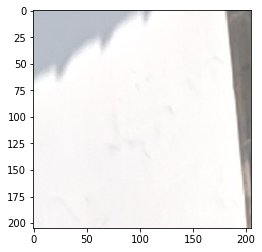

In [0]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
testim = mpimg.imread('/content/gdrive/My Drive/ML PROJECTS/face_recognition-master/tests/test_images/gdg.jpg')
#im1 = testim.crop((left, top, right, bottom))
#figure()
face_image = image[top:bottom, left:right]
pil_image = Image.fromarray(face_image)
imshow(pil_image)

I found 39 face(s) in this photograph.
A face is located at pixel location Top: 408, Left: 2309, Bottom: 503, Right: 2403
A face is located at pixel location Top: 628, Left: 556, Bottom: 707, Right: 635
A face is located at pixel location Top: 888, Left: 955, Bottom: 982, Right: 1050
A face is located at pixel location Top: 524, Left: 1740, Bottom: 603, Right: 1819
A face is located at pixel location Top: 427, Left: 859, Bottom: 522, Right: 954
A face is located at pixel location Top: 955, Left: 2011, Bottom: 1050, Right: 2106
A face is located at pixel location Top: 460, Left: 1196, Bottom: 539, Right: 1275
A face is located at pixel location Top: 572, Left: 1348, Bottom: 651, Right: 1427
A face is located at pixel location Top: 1070, Left: 1214, Bottom: 1165, Right: 1309
A face is located at pixel location Top: 284, Left: 1268, Bottom: 363, Right: 1347
A face is located at pixel location Top: 772, Left: 331, Bottom: 867, Right: 426
A face is located at pixel location Top: 1301, Left:

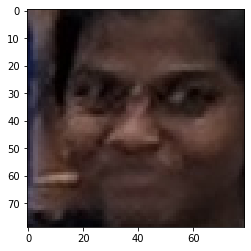

In [0]:
from PIL import Image
import face_recognition
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/ML PROJECTS/face_recognition-master/tests/test_images/gdg.jpg")

# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    
    #counter=0
    #pill_image=[]
    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image= Image.fromarray(face_image)
    #pil_image[counter] = Image.fromarray(face_image)
    #pil_image.show()
    imshow(pil_image)
    #countr+=1

In [0]:
import face_recognition

# Load the jpg files into numpy arrays
biden_image = face_recognition.load_image_file("/content/gdrive/My Drive/ML PROJECTS/face_recognition-master/tests/test_images/biden.jpg")
obama_image = face_recognition.load_image_file("/content/gdrive/My Drive/ML PROJECTS/face_recognition-master/tests/test_images/obama.jpg")
unknown_image = face_recognition.load_image_file("/content/gdrive/My Drive/ML PROJECTS/face_recognition-master/tests/test_images/obama2.jpg")

# Get the face encodings for each face in each image file
# Since there could be more than one face in each image, it returns a list of encodings.
# But since I know each image only has one face, I only care about the first encoding in each image, so I grab index 0.
try:
    biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

known_faces = [
    biden_face_encoding,
    obama_face_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

print("Is the unknown face a picture of Biden? {}".format(results[0]))
print("Is the unknown face a picture of Obama? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? True
Is the unknown face a new person that we've never seen before? False
